In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import pandas as pd

Import the table obtained in the access phase

In [3]:
krannet_df = pd.read_json('../cache/network_analysis_data.json')
#krannet_df.sort_values(by=['meeting_id'], inplace=True)

# remove some people
krannet_df = krannet_df[krannet_df.interventions > 2]

display(krannet_df.tail(), len(krannet_df))


,year,speaker_id,meeting_id,speaker_name,interventions
168,1861,140,7,Abg. v. Strahl,4
169,1861,103,6,Abg. Guttman,3
173,1861,39,2,Abg. Dr. Bleiweis,4
176,1861,168,9,Präsident,6
178,1861,82,5,Abg. Ambrosch,13


48

Plot social network of people giving a pitch in the same meeting

In [4]:
def add_edges_for_meeting(meeting_id, graph, dataframe):

    # Generate all possible combinations of pairs within a list
    combinations_list = list(combinations(dataframe[dataframe.meeting_id == meeting_id].speaker_name, 2))
    
    # Add Edges
    for s1, s2 in combinations_list:
        graph.add_edge(s1, s2)


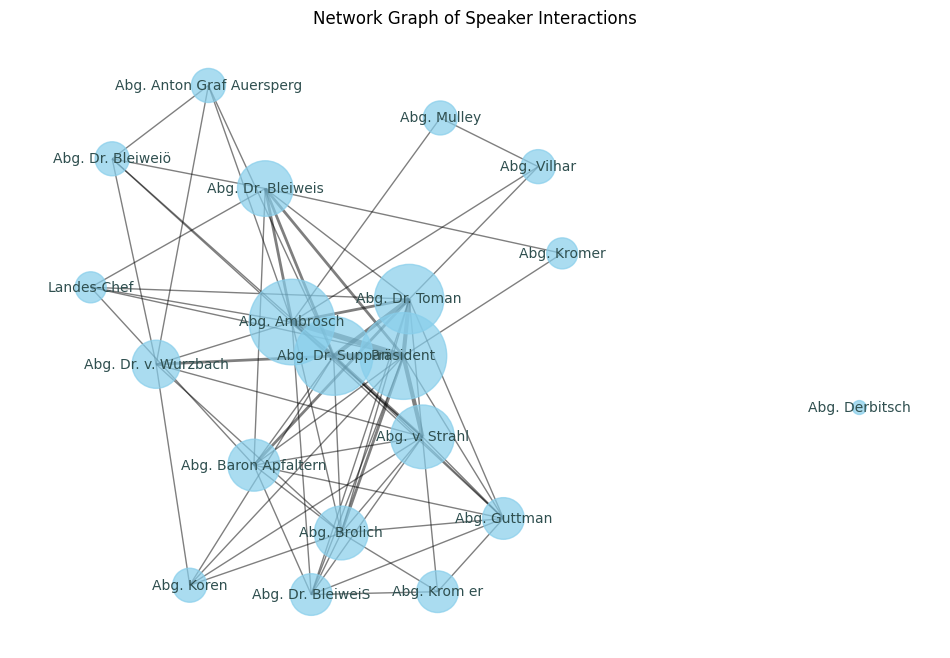

In [5]:
G = nx.Graph()

# Create counters for nodes and edges
node_counter = Counter()
edge_counter = Counter()

for m in set(krannet_df.meeting_id):
    combinations_list = list(combinations(krannet_df[krannet_df.meeting_id == m].speaker_name, 2))
    #print(combinations_list[:5])
    
    # Add Edges
    for s1, s2 in combinations_list:
        G.add_edge(s1, s2)
        node_counter[s1] += 1
        node_counter[s2] += 1
        edge_counter[(s1, s2)] += 1


# Normalize node sizes for better visualization
node_sizes = [node_counter[node] * 100 for node in G.nodes()]  # Adjust scaling factor as needed

# Normalize edge widths for better visualization
edge_widths = [edge_counter[edge] for edge in G.edges()]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Use a layout for the graph
pos = nx.spring_layout(G, seed=42)  # spring layout with a fixed seed for reproducibility

# Draw nodes and edges with attributes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='darkslategray')

# Title and display options
plt.title('Network Graph of Speaker Interactions')
plt.axis('off')  # Hide the axes
plt.show();

In [6]:
# calculate degree centrality and betweenness for nx
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# define the node labels
nodes = list(set(krannet_df.speaker_name))
print(nodes)

# retrieve degree centrality for each node
dc_calculations = []
bc_calculations = []

for node in nodes:
    dc_calculations += [degree_centrality[node]]
    bc_calculations += [betweenness_centrality[node]]

# create a centrality data df to store values
centrality_data = pd.DataFrame()

# populate the df with the nodes and their centrality values
centrality_data["Node"] = nodes
centrality_data["Degree-Centrality"] = dc_calculations
centrality_data["Betweenness-Centrality"] = bc_calculations

display(centrality_data)

['Abg. v. Strahl', 'Abg. Dr. Bleiweis', 'Präsident', 'Abg. Dr. BleiweiS', 'Abg. Kromer', 'Abg. Dr. v. Wurzbach', 'Abg. Vilhar', 'Abg. Mulley', 'Abg. Dr. Bleiweiö', 'Abg. Guttman', 'Abg. Baron Apfaltern', 'Abg. Derbitsch', 'Abg. Dr. Toman', 'Landes-Chef', 'Abg. Brolich', 'Abg. Anton Graf Auersperg', 'Abg. Koren', 'Abg. Dr. Suppan', 'Abg. Krom er', 'Abg. Ambrosch']


,Node,Degree-Centrality,Betweenness-Centrality
0,Abg. v. Strahl,0.684211,0.028850
1,Abg. Dr. Bleiweis,0.526316,0.021832
2,Präsident,1.000000,0.218421
3,Abg. Dr. BleiweiS,0.473684,0.000000
4,Abg. Kromer,0.263158,0.000000
5,Abg. Dr. v. Wurzbach,0.473684,0.012183
6,Abg. Vilhar,0.315789,0.000000
7,Abg. Mulley,0.315789,0.000000
8,Abg. Dr. Bleiweiö,0.315789,0.000000
9,Abg. Guttman,0.473684,0.000000
